# ITS307 Data Analytics : Assignment 1

**Gyalpozhing College of Information Technology </br>
Spring Semester 2022**</br>


## Part 1: Drake or Rihanna?

Billboard Magazine puts out a top 100 list of "singles" every week. Information from this list, as well as that from music sales, radio, and other sources is used to determine a top-100 "singles" of the year list. A single is typically one song, but sometimes can be two songs which are on one "single" record.

In this homework you will:

1. Read data from ``yearinfo.json`` which is scraped from Wikipedia to obtain information about the best singers and groups from each year (distinguishing between the two groups) as determined by the Billboard top 100 charts. You will have to clean this data.First you will learn how to read data from json files and create dataframe.

2. Use pandas and matplotlib to represents and explore data

### 1.1 Loading data from json file

Load our JSON file into the ``yearinfo`` variable, just to be sure everything is working.

In [251]:
#Write your code here, You may need to use python open() function to open the file and load data.
import pandas as pd

In [252]:
import json
# Load data using python JSON module
# return json  object as a dictionary
with open('yearinfo.json', 'r') as json_file:

  yearinfo = json.load(json_file)
print(yearinfo)


{'2010': [{'band_singer': ['Kesha'], 'song': ['/wiki/Tik_Tok_(song)'], 'songurl': ['Tik Tok (song)'], 'ranking': 1, 'titletext': '"Tik Tok"', 'url': ['/wiki/Kesha']}, {'band_singer': ['Lady Antebellum'], 'song': ['/wiki/Need_You_Now_(Lady_Antebellum_song)'], 'songurl': ['Need You Now (Lady Antebellum song)'], 'ranking': 2, 'titletext': '"Need You Now"', 'url': ['/wiki/Lady_Antebellum']}, {'band_singer': ['Train (band)'], 'song': ['/wiki/Hey,_Soul_Sister'], 'songurl': ['Hey, Soul Sister'], 'ranking': 3, 'titletext': '"Hey, Soul Sister"', 'url': ['/wiki/Train_(band)']}, {'band_singer': ['Katy Perry', 'Snoop Dogg'], 'song': ['/wiki/California_Gurls'], 'songurl': ['California Gurls'], 'ranking': 4, 'titletext': '"California Gurls"', 'url': ['/wiki/Katy_Perry', '/wiki/Snoop_Dogg']}, {'band_singer': ['Usher (musician)', 'Will.i.am'], 'song': ['/wiki/OMG_(Usher_song)'], 'songurl': ['OMG (Usher song)'], 'ranking': 5, 'titletext': '"OMG"', 'url': ['/wiki/Usher_(musician)', '/wiki/Will.i.am']}, 

In [253]:
df.shape

(1200, 9)

In [254]:
# Display 2020 key contains
year = yearinfo['2020']
year

[{'band_singer': ['The Weeknd'],
  'song': ['/wiki/Blinding_Lights'],
  'songurl': ['Blinding Lights'],
  'ranking': 1,
  'titletext': '"Blinding Lights"',
  'url': ['/wiki/The_Weeknd']},
 {'band_singer': ['Post Malone'],
  'song': ['/wiki/Circles_(Post_Malone_song)'],
  'songurl': ['Circles (Post Malone song)'],
  'ranking': 2,
  'titletext': '"Circles"',
  'url': ['/wiki/Post_Malone']},
 {'band_singer': ['Roddy Ricch'],
  'song': ['/wiki/The_Box_(Roddy_Ricch_song)'],
  'songurl': ['The Box (Roddy Ricch song)'],
  'ranking': 3,
  'titletext': '"The Box"',
  'url': ['/wiki/Roddy_Ricch']},
 {'band_singer': ['Dua Lipa'],
  'song': ['/wiki/Don%27t_Start_Now'],
  'songurl': ["Don't Start Now"],
  'ranking': 4,
  'titletext': '"Don\'t Start Now"',
  'url': ['/wiki/Dua_Lipa']},
 {'band_singer': ['DaBaby', 'Roddy Ricch'],
  'song': ['/wiki/Rockstar_(DaBaby_song)'],
  'songurl': ['Rockstar (DaBaby song)'],
  'ranking': 5,
  'titletext': '"Rockstar"',
  'url': ['/wiki/DaBaby', '/wiki/Roddy_Ricc

### 1.2 Constructing dataframe from `yearinfo`

Construct a year-song-singer dataframe from the yearly information

Let's construct a dataframe **`df`** from the `yearinfo`. The frame should be similar to the frame below. Each row of the frame represents a song, and carries with it the chief properties of year, song, singer, and ranking.

![image-3.png](attachment:image-3.png)

To construct the dataframe, we'll need to iterate over the years and the singles per year. Notice how, above, the dataframe is ordered by ranking and then year. While the exact order is up to you, note that you will have to come up with a scheme to order the information.

Check that the dataframe has sensible data types. You will also likely find that the year field has become an "object" (Pandas treats strings as generic objects): this is due to the conversion to and back from JSON. Such conversions need special care. Fix any data type issues with `df`. (See Pandas astype function.) We will use this `df` in the next question.

In [255]:
# Creating list
yearinfo_list = []
for key, values in yearinfo.items():# Prasing tuple
  for i in values:
    yearinfo_list.append(list(i.values()) + [key])
type(yearinfo_list)    

list

In [256]:
#Converting list to data frame
df = pd.DataFrame(yearinfo_list)
df.head()

0                                            1  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                       2  3                   4  \
0                       [Tik Tok (song)]  1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]  2      "Need You Now"   
2                     [Hey, Soul Sister]  3  "Hey, Soul Sister"   
3                     [California Gurls]  4  "California Gurls"   
4                     [OMG (Usher song)]  5               "OMG"   

                                           5     6  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [257]:
# Renaming all columns
df.columns = ['band_singer','song','songurl','ranking','titletext','url','year']
df.head()

band_singer                                         song  \
0                        [Kesha]                       [/wiki/Tik_Tok_(song)]   
1              [Lady Antebellum]  [/wiki/Need_You_Now_(Lady_Antebellum_song)]   
2                 [Train (band)]                     [/wiki/Hey,_Soul_Sister]   
3       [Katy Perry, Snoop Dogg]                     [/wiki/California_Gurls]   
4  [Usher (musician), Will.i.am]                     [/wiki/OMG_(Usher_song)]   

                                 songurl  ranking           titletext  \
0                       [Tik Tok (song)]        1           "Tik Tok"   
1  [Need You Now (Lady Antebellum song)]        2      "Need You Now"   
2                     [Hey, Soul Sister]        3  "Hey, Soul Sister"   
3                     [California Gurls]        4  "California Gurls"   
4                     [OMG (Usher song)]        5               "OMG"   

                                         url  year  
0                              [/wiki/Kesha]  2010  
1                    [/wiki/Lady_Antebellum]  2010  
2                       [/wiki/Train_(band)]  2010  
3       [/wiki/Katy_Perry, /wiki/Snoop_Dogg]  2010  
4  [/wiki/Usher_(musician), /wiki/Will.i.am]  2010

In [258]:
# Checks null values
df.isnull().sum()

band_singer    0
song           0
songurl        0
ranking        0
titletext      0
url            0
year           0
dtype: int64

In [259]:
# Data types
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year           object
dtype: object

In [260]:
# Changing dtypes
df.year = df.year.astype('int')

In [261]:
df.dtypes

band_singer    object
song           object
songurl        object
ranking         int64
titletext      object
url            object
year            int32
dtype: object

In [262]:
# sorting band_singer in list
lst = []
for values in df.band_singer:
    print(values)
    lst.append(values)
lst

['Kesha']
['Lady Antebellum']
['Train (band)']
['Katy Perry', 'Snoop Dogg']
['Usher (musician)', 'Will.i.am']
['B.o.B', 'Hayley Williams']
['Eminem', 'Rihanna']
['Lady Gaga']
['Taio Cruz']
['Taio Cruz', 'Ludacris']
['B.o.B', 'Bruno Mars']
['Enrique Iglesias', 'Pitbull (rapper)']
['Young Money', 'Lloyd (singer)']
['Jason Derulo']
['Rihanna']
['Lady Gaga', 'Beyoncé']
['Katy Perry']
['Bruno Mars']
['Mike Posner']
['The Black Eyed Peas']
['Jay-Z', 'Alicia Keys']
['Usher (musician)', 'Pitbull (rapper)']
['Travie McCoy', 'Bruno Mars']
['Eminem']
['Iyaz']
['David Guetta', 'Akon']
['The Script']
['Kesha']
['The Black Eyed Peas']
['Owl City']
['Trey Songz', 'Fabolous']
['Drake (rapper)']
['Lady Gaga']
['Jason Derulo']
['Nelly']
['Ludacris']
['Far East Movement', 'The Cataracs', 'Dev (singer)']
['Timbaland', 'Justin Timberlake']
['Michael Bublé']
['Flo Rida', 'David Guetta']
['Jay Sean', 'Lil Wayne']
['La Roux']
['Jason Derulo']
['Justin Bieber', 'Ludacris']
['Adam Lambert']
['Taylor Swift']
['R

[['Kesha'],
 ['Lady Antebellum'],
 ['Train (band)'],
 ['Katy Perry', 'Snoop Dogg'],
 ['Usher (musician)', 'Will.i.am'],
 ['B.o.B', 'Hayley Williams'],
 ['Eminem', 'Rihanna'],
 ['Lady Gaga'],
 ['Taio Cruz'],
 ['Taio Cruz', 'Ludacris'],
 ['B.o.B', 'Bruno Mars'],
 ['Enrique Iglesias', 'Pitbull (rapper)'],
 ['Young Money', 'Lloyd (singer)'],
 ['Jason Derulo'],
 ['Rihanna'],
 ['Lady Gaga', 'Beyoncé'],
 ['Katy Perry'],
 ['Bruno Mars'],
 ['Mike Posner'],
 ['The Black Eyed Peas'],
 ['Jay-Z', 'Alicia Keys'],
 ['Usher (musician)', 'Pitbull (rapper)'],
 ['Travie McCoy', 'Bruno Mars'],
 ['Eminem'],
 ['Iyaz'],
 ['David Guetta', 'Akon'],
 ['The Script'],
 ['Kesha'],
 ['The Black Eyed Peas'],
 ['Owl City'],
 ['Trey Songz', 'Fabolous'],
 ['Drake (rapper)'],
 ['Lady Gaga'],
 ['Jason Derulo'],
 ['Nelly'],
 ['Ludacris'],
 ['Far East Movement', 'The Cataracs', 'Dev (singer)'],
 ['Timbaland', 'Justin Timberlake'],
 ['Michael Bublé'],
 ['Flo Rida', 'David Guetta'],
 ['Jay Sean', 'Lil Wayne'],
 ['La Roux'],


In [263]:
#flatten the nested list to the single list

new_list = [items for element in lst for items in element]
new_list[:10]

['Kesha',
 'Lady Antebellum',
 'Train (band)',
 'Katy Perry',
 'Snoop Dogg',
 'Usher (musician)',
 'Will.i.am',
 'B.o.B',
 'Hayley Williams',
 'Eminem']

In [264]:
# conver list o dataframe
singer_name = pd.DataFrame(new_list)
singer_name

0
0                    Kesha
1          Lady Antebellum
2             Train (band)
3               Katy Perry
4               Snoop Dogg
...                    ...
1770              BRS Kash
1771              Rod Wave
1772            Chase Rice
1773  Florida Georgia Line
1774        Rauw Alejandro

[1775 rows x 1 columns]

In [265]:
singer_name.columns = ['band_singer']
singer_name.head()

band_singer
0            Kesha
1  Lady Antebellum
2     Train (band)
3       Katy Perry
4       Snoop Dogg

In [266]:
# it will replace old data frame columns to new data frame columns
df.band_singer = singer_name.band_singer
df.band_singer.head()

0              Kesha
1    Lady Antebellum
2       Train (band)
3         Katy Perry
4         Snoop Dogg
Name: band_singer, dtype: object

### 1.3 Who are the highest quality singers?

Here we show the highest quality singers and plot them on a bar chart.

#### Find highest quality singers according to how prolific they are

What do we mean by highest quality? This is of course open to interpretation, but let's define "highest quality" here as the number of times a singer appears in the top 100 over this time period. If a singer appears twice in a year (for different songs), this is counted as two appearances, not one. 

Make a bar-plot of the most prolific singers. Singers on this chart should have appeared at-least more than 15 times. (HINT: look at the docs for the pandas method `value_counts`.)

In [267]:
#Write your program and plot bar graph


In [268]:
# it will display all value from band singer

singer = df.band_singer[:]
singer

0                 Kesha
1       Lady Antebellum
2          Train (band)
3            Katy Perry
4            Snoop Dogg
             ...       
1195        Post Malone
1196         Bruno Mars
1197            Cardi B
1198           Ella Mai
1199           Dua Lipa
Name: band_singer, Length: 1200, dtype: object

In [269]:
#Ploting bar plot chart

quality_counts = df.band_singer.value_counts()
quality_bands = quality_counts[quality_counts.values>=15] #  singers on this chart should have appeared at-least more than 15 times
quality_bands

Rihanna             31
Drake (musician)    29
Nicki Minaj         25
Lil Wayne           18
Taylor Swift        18
Chris Brown         17
Maroon 5            16
Justin Bieber       16
Bruno Mars          16
Katy Perry          15
Name: band_singer, dtype: int64

Text(0, 0.5, 'Frequencies')

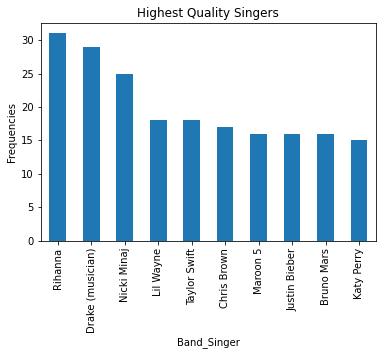

In [270]:
# this chart will display the result of most apperance at-least or more than 15 times
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.DataFrame(quality_bands)
data['band_singer'].plot(kind="bar")
plt.title("Highest Quality Singers")
plt.xlabel("Band_Singer")
plt.ylabel("Frequencies")

**Question: Who is the most profilic singer?**


##### From the above graph, we can conclude that Rihanna is the most profilic singer among other singer. As her appearence was 31 time 

The singer at the top tends to shift the place, when their is change in materic. since the total score was calculated as 101 - ranking. Some of the artist appear more than twice which lead to get extra point. Example like Lil Wayne and Taylor Swift both appear 18 times, whereby the ranking of Lil Wayne's song was much more higher than Taylor Swift which gives extra points to Lil Wayne as compared to Taylor Swift 

### 1.4 What if we used a different metric?

What we would like to capture is this: a singer should to be scored higher if the singer appears higher in the rankings. So we'd say that a singer who appeared once at a higher and once at a lower ranking is a "higher quality" singer than one who appeared twice at a lower ranking.

To do this, group all of a singers songs together and assign each song a score 101 - ranking. Order the singers by their total score and make a bar chart for the top 20.

In [271]:
import seaborn as sns

C:\Users\Acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


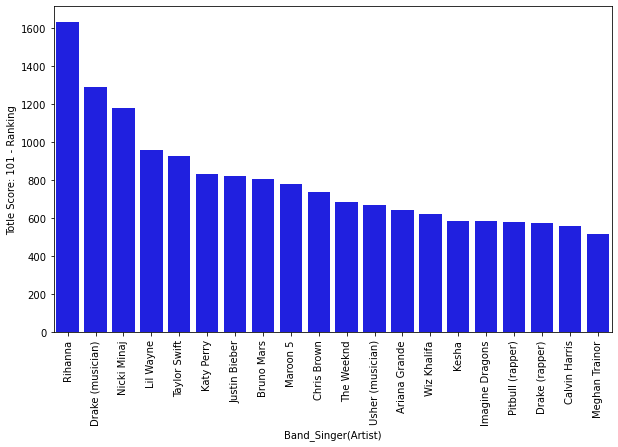

In [272]:
df['totle_score'] = 101 - df['ranking']

new_ranking = df.groupby('band_singer').totle_score.sum().sort_values(ascending = False)
top_20 = new_ranking.head(20)

f = plt.figure(figsize = (10,6), frameon = False)
sns.barplot(top_20.index, top_20.values, color = 'blue')
plt.xticks(rotation=90)
plt.xlabel('Band_Singer(Artist)')
plt.ylabel('Totle Score: 101 - Ranking');

**Question:Do you notice any major differences when you change the metric? How have the singers at the top shifted places? Why do you think this happens?**

## Part 2: Using group properties

Frame any questions that you want to answer using group properties and interpret your result using appropriate visualizations.
 

In [273]:
# Find the best singer by most frequency by selecting the particular year

In [274]:
# Total groups
len(df.groupby('year'))

12

In [275]:
# Framing new dataframe from df dataframe
new_data = df[['band_singer','ranking','year']]
# Grouping by year
year = new_data.groupby('year')
# Selecting particular group
year = year.get_group(2020)
# Finding highest frequency over particular group
highest_frequency = year['band_singer'].value_counts(sort = True)[:10]
highest_frequency

Quavo               3
Justin Bieber       3
Alessia Cara        3
The Chainsmokers    3
The Weeknd          2
Taylor Swift        2
Migos               2
Rihanna             2
Lil Uzi Vert        2
Khalid (singer)     2
Name: band_singer, dtype: int64

In [276]:
# Converting series to DataFrame
year2020 = pd.DataFrame(highest_frequency)
year2020

band_singer
Quavo                       3
Justin Bieber               3
Alessia Cara                3
The Chainsmokers            3
The Weeknd                  2
Taylor Swift                2
Migos                       2
Rihanna                     2
Lil Uzi Vert                2
Khalid (singer)             2

Text(0, 0.5, 'Frequency')

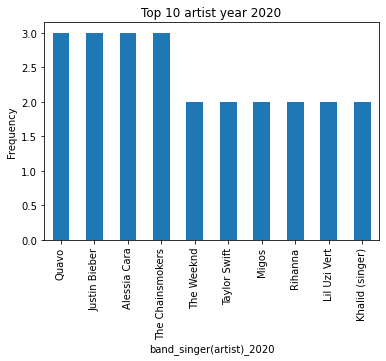

In [277]:
# Plotting bar chart
year2020['band_singer'].plot(kind = "bar")
plt.title("Top 10 artist year 2020")
plt.xlabel('band_singer(artist)_2020')
plt.ylabel('Frequency')